In the name of god

Ali Ataollahi / 810199461

AI_FALL_1401 / CA3 / Naive Bayes


## Import Dependencies

In [1]:
import pandas as pd
from math import *
from hazm import stopwords_list, Normalizer, word_tokenize
from matplotlib import pyplot as plt
from operator import itemgetter
import arabic_reshaper
from bidi.algorithm import get_display

# Part1 : preprocessing data

In [2]:
data_train = pd.read_csv('files/train.csv')
data_test = pd.read_csv('files/test.csv')

In [3]:
data_train

,label,content
0,فناوری,گزارش های منتشر شده حاکی از آن است که کاربران ...
1,ورزشی,سوپر استار سینما و از قهرمانان سابق ووشو ــ کو...
2,حوادث,مدیرعامل شرکت عمران آب کیش از فوت یک نفر در آت...
3,فناوری,یک نوجوان انگلیسی به اتهام هک حساب‌های کاربری ...
4,سلامت,دانشمندان در جدیدترین مطالعات خود اثرات جدید و...
...,...,...
8995,حوادث,شانزدهم مهر امسال درپی تماس با مرکز فوریت‌های ...
8996,ورزشی,اتحادیه فوتبال ترینیداد و توباگو اعلام کرده تی...
8997,فرهنگی/هنری,اسامی 18 فیلم بخش مسابقه مستند ششمین دوره جشنو...
8998,حوادث,کامیونت حامل بار تخته‌های چوبی عصر دیروز چهارش...


In [4]:
data_test

,label,content
0,فناوری,بعد از اعلام لیست ۲۳ شرکت مجاز ثبت سفارش و ارا...
1,فرهنگی/هنری,یک استاد علم قرائت قرآن کریم، گفت: ریشه موسیقی...
2,حوادث,آتش سوزی های زنجیره ای جنگل های زاگرس در استان...
3,فناوری,استفاده از سرویس‌های iMassage یا Facetime محصو...
4,حوادث,دادستان عمومی و انقلاب یاسوج گفت: 10 میلیون دل...
...,...,...
1110,ورزشی,عضو هیات مدیره باشگاه استقلال گفت:من هیچوقت به...
1111,حوادث,مدیر آموزش و پرورش شهرستان جیرفت از دستگیری دا...
1112,سیاسی,رییس جمهور با بیان اینکه در هفته گذشته هیچ شهر...
1113,فناوری,دارندگان مدل‌های اعلام‌شده گوشی‌های هوآوی، می‌...


In [5]:
stop_words = set(stopwords_list("stopwords.txt"))

In [6]:
normalizer = Normalizer()
def clean_data(data):
    for i in range(len(data['content'])):
        sentence = normalizer.normalize(data['content'][i])
        words = word_tokenize(sentence)
        final_words = [word.replace('\u200c', '') for word in words]
        final_words = [word for word in final_words if word not in stop_words]
        data['content'][i] = final_words

clean_data(data_train) 
clean_data(data_test)       
print(data_train['content'][0])

['گزارشهای', 'منتشر', 'حاکی', 'کاربران', 'تلگرام', 'مناطقی', 'جهان', 'اروپا', 'خاورمیانه', 'مشکل', 'مواجه', 'شدهاند', 'گزارش', 'ایسنا', 'نقل', 'تلگرام', 'دقایقی', 'پیام', 'رسان', 'تلگرام', 'صفحه', 'توییتر', 'دسترسی', 'کاربران', 'اپلیکیشن', 'اروپا', 'خاورمیانه', 'مشکل', 'مواجه', 'شده_است', 'طبق', 'پیام', 'نظر', 'میرسد', 'منشا', 'اختلالات', 'ظهر', 'شنبه', 'خارجی', 'پیام', 'رسان', 'ارتباطی', 'کشور', 'پیام', 'رسان', 'خصوص', 'متخصصان', 'تلگرام', 'متوجه', 'اختلالی', 'شدهاند', 'بررسی', 'برطرف', 'مشکل', 'مربوطه', 'امید', 'زودی', 'اختلال', 'رفع', 'کاربران', 'حسابهای', 'کاربری', 'تلگرام', 'دسترسی']


As you can see, first we read the information of the files, then we normalize 'content' col and do not put in output words that are similar to stopwords.

#### Question 1
stemming : stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. 

lemmatization : the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form.

diffrence :
Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.

https://d2mk45aasx86xg.cloudfront.net/difference_between_Stemming_and_lemmatization_8_11zon_452539721d.webp

# Part 2 : problem process

In [7]:
labels = list(set(data_train['label']))
mistakes = []
labels_freq_count = [0 for i in range(len(labels))] 
labels_dicts = [{} for i in range(len(labels))] 

for i in range(data_train.shape[0]):
    label_index = labels.index(data_train['label'][i])
    for word in data_train['content'][i]:
        if word in labels_dicts[label_index]:
            labels_dicts[label_index][word] += 1
            labels_freq_count[label_index] += 1
        else:
            labels_dicts[label_index][word] = 1
            labels_freq_count[label_index] += 1
            

In this part , put words in dict base of its label. So every lable has dict and in this dict there is words and their frequency.

In next step we try to predict label of contents

In [8]:
tp = dict(zip(labels, [0] * len(labels))) 
fp = dict(zip(labels, [0] * len(labels))) 
fn = dict(zip(labels, [0] * len(labels))) 

def get_feature_prob(word_list, freq_count, word):
    if (word not in word_list):
        return -inf
    else:
        return log((word_list[word]) / freq_count)
    
predict_label = [''] * data_test.shape[0]
corrected = 0

for i in range(data_test.shape[0]):
    labels_prob = dict(zip(labels, [0] * len(labels))) 
    for word in data_test['content'][i]:
        for label in labels_prob:
            label_index = labels.index(label)
            labels_prob[label] += get_feature_prob(labels_dicts[label_index], labels_freq_count[label_index], word)
    
    predict_label = max(labels_prob, key=labels_prob.get)
    
    label = data_test['label'][i]
    if predict_label == data_test['label'][i]:
        corrected += 1
        tp[label] += 1
    else :
        fn[label] += 1
        fp[predict_label] += 1

print("the accuracy without smoothing method :", corrected / data_test.shape[0])

the accuracy without smoothing method : 0.2789237668161435


#### Question 2

$$ P(c|x) = \frac{P(x|c)P(c)}{P(x)} $$

* Evidence : the probability of the $x$ used to update the prior. 

In our case, the probability of the occurness of the word $x$ in the given text. computed by dividing the $x$ freq by the sum of the freq of all the text words.W e can ignore it because of we do not need to compute this probability because we want to compare two classes and this parameter is same for all classes.

* Likelihood : if an event $c$ has already occurred, the probability that the event $x$ will occur given the knowledge. 

In our case, likelihood is the probability of the occurness of the word $x$ given the class $c$ (from 6 classes). computed by dividing the $x$ freq in the class $c$ by the sum of freq of all the words in the class $c$. 

* Prior : the probability of the the class $c$. 

In our case is In training data is symmetric. Therefore, we do not need to compute it (in all labels is same). But in test data is not symmetric

* Posterior : if an event $x$ has already occurred, the probability that the event $c$ will occur given the knowledge. 

In our case, posterior is the probability of the occurness of the class $c$ given the word $x$. computed by the given formula. We will compare this probability for 6 classes to choose one of the classes for the given content. 

#### Bigrams

#### Question 3
example:

در مراسم تدفین شرکت میکنم

در فلان شرکت سرمایه گذاری میکنم

It helps to predict much better. Because we save more structure of that type of sentence and meaning of that and consider place of word in sentence. So bigrams increase accuracy. 

n-bigrams can be better or can't. This is related to n and the sentences we predict. but generally if n is not too big, the result of predict is better.

### Additive Smoothing

In [9]:
tp_with_additive_smoothing = dict(zip(labels, [0] * len(labels))) 
fp_with_additive_smoothing = dict(zip(labels, [0] * len(labels))) 
fn_with_additive_smoothing = dict(zip(labels, [0] * len(labels))) 

ZERO = 1/9999999999999999999999999999999999999

def get_feature_prob(word_list, freq_count, word):
    if (word not in word_list):
        return log(1 + ZERO)
    else:
        return log(1 + (word_list[word]) / freq_count)
    
predict_label = [''] * data_test.shape[0]
corrected = 0

for i in range(data_test.shape[0]):
    labels_prob = dict(zip(labels, [0] * len(labels))) 
    for word in data_test['content'][i]:
        for label in labels_prob:
            label_index = labels.index(label)
            labels_prob[label] += get_feature_prob(labels_dicts[label_index], labels_freq_count[label_index], word)
    
    predict_label = max(labels_prob, key=labels_prob.get)
    
    label = data_test['label'][i]
    if predict_label == data_test['label'][i]:
        corrected += 1
        tp_with_additive_smoothing[label] += 1
    else :
        mistakes.append({'label':label, 'predict_label':predict_label, 'sentece': " ".join(data_test['content'][i])})
        fn_with_additive_smoothing[label] += 1
        fp_with_additive_smoothing[predict_label] += 1

print("the accuracy with smoothing method :", corrected / data_test.shape[0])

the accuracy with smoothing method : 0.8896860986547085


We change the computation of class probablity by adding 1 to log and delete -inf for zero. Because of this we have better prediction and if a word is not in content, we handle and balance it better and put not pure -inf in computation.

#### Question 4

There is word or words contained only one type or some type of classes, Naive Bayes chooses that label as the answer which might be wrong in some of the cases.

$P(x|c) = 0$ means word $x$ hasn't appeared in label $c$ .

because of choosing the label which maximizes the sum $ sum_{i=1}^{n} log(P(x_i | c)) $ , and if $log(0) = - \infty$ some label (might the true label) never will be chosen as the label

#### Question 5

is a technique used to smooth categorical data. Given a set of observation counts $ x   =   ⟨ x 1 , x 2 , … , x d ⟩ $ from a d -dimensional multinomial distribution with N trials, a "smoothed" version of the counts gives the estimator

Here's how we calculate probability:

$$ P(Word|Class) = \frac{Word Count + \alpha}{Total Words} $$

How it is help ?

As mentioned in Question 4, alpha will avoid the $- \infty$ problem mentioned in since the fraction will never be equal to 0 because of the positive $\alpha$ in the numerator.

In next step we draw some plots of most appeared words.

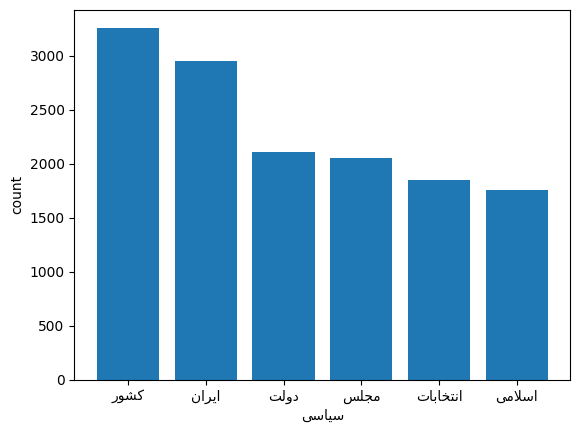

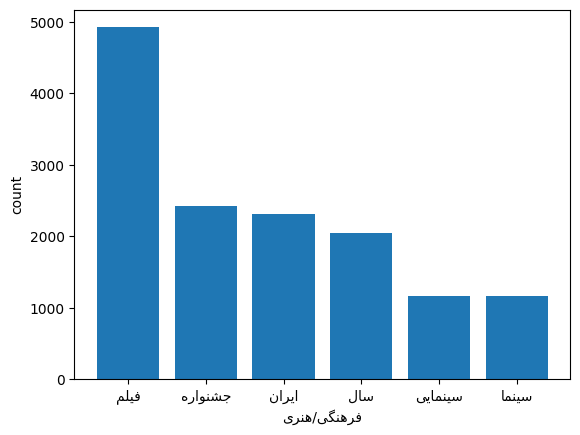

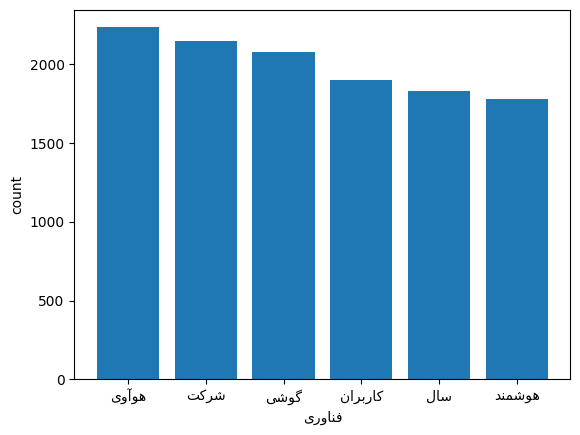

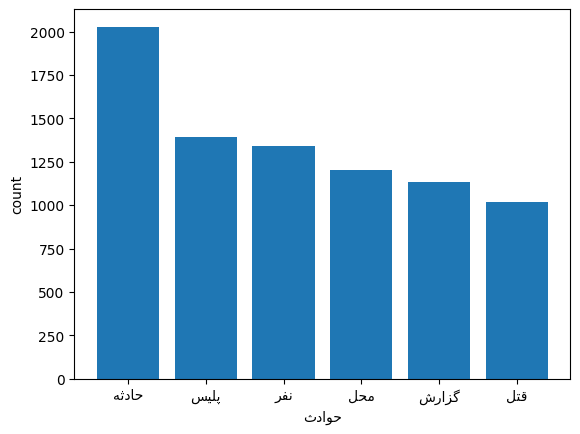

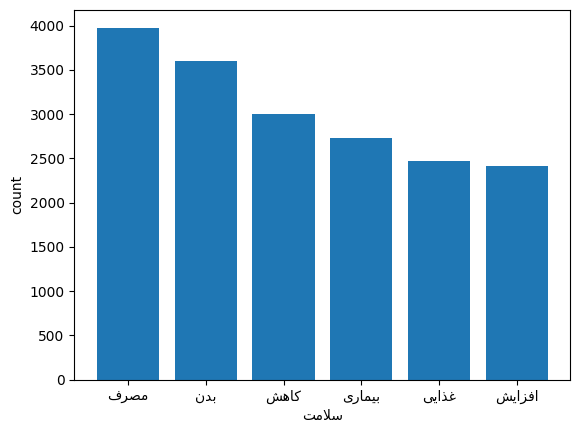

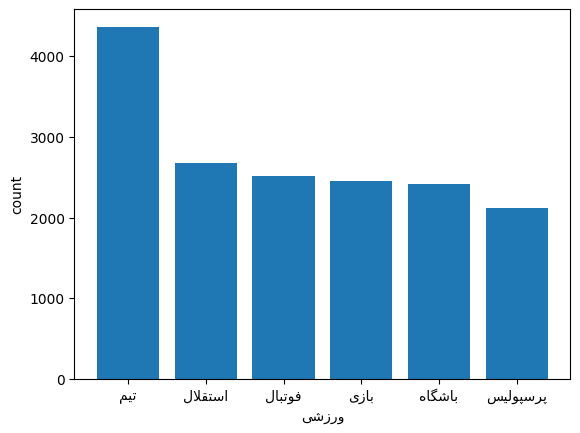

In [10]:
for i in range(len(labels)):
    temp_dict = dict(sorted(labels_dicts[i].items(), key = itemgetter(1), reverse = True)[:len(labels)])
    keys = []
    for key in temp_dict.keys():
        keys.append(get_display(arabic_reshaper.reshape(key)))
    values = temp_dict.values()
    plt.bar(keys, values)
    plt.xlabel(get_display(arabic_reshaper.reshape(labels[i])))
    plt.ylabel('count')
    plt.show()


# Part 3 : evaluation

We write again formulas:

$$accuracy = \frac{TP + TN}{TP + FN + TN + FP}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F1 = \frac{2 \times precision \times recall}{precision + recall}$$

$$TP = true positive, TN = true negative, FP = false positive, FN = false negative$$

**Note** : accuracy already computed.

#### Qestion 7

The recall value for will be 100% if the model always labels every data a specific class(like sport) and this is bad. So recall is not enough for evaluating.

Consider a model that wrongly predict (except one content that is really recommended) all the contetns like sports class. Therefore the precision of this model will be 1.00 and this bad. So precision alone is not enough to evaluate a model.

#### Qestion 8

The F1 score is the harmonic mean of precision but the recall taking both into account. because of harmonic mean punishes extreme values precision uses the harmonic mean instead of a simple average. Therefore A classifier that has a precision of 1.0 and a recall of 0.0 has simple average = 0.5 but F1 = 0.

#### Qestion 9

* Micro computes these : F1 by value total tp, fn, fp (the value of the prediction for each label in the dataset is not matter)

* Macro computes these : F1 for each label and returns the average (the proportion for each label in the dataset is not matter).

* Weighted computes these : like macro F1 for each label and returns the average (but the proportion for each label in the dataset is not matter).

without additive smoothing

---

$$Macro average = \frac{1.52}{6} = 0.25$$

---

$$Micro average = 2 \times \frac{0.27 \times 0.27}{0.27 + 0.27} = 0.27$$

---

$$Weighted average = \frac{472286}{1820817} = 0.26$$

---

with additive smoothing

---

$$Macro average = \frac{5.32}{6} = 0.89$$

---

$$Micro average = \frac{2\times 0.89 \times 0.89}{0.89 + 0.89} = 0.89$$

---

$$Weighted average = \frac{1612952}{1820817} = 0.88$$

---

#### Qestion 10


#### For without additive smoothing

In [11]:
F1_sum, weighted_sum, overall_size, precision_numerator, precision_denominator, recall_denominator = 0, 0, 0, 0, 0, 0
for label in labels:
    recall = tp[label] / (tp[label] + fn[label])
    precision = tp[label] / (tp[label] + fp[label])
    F1 = (2 * precision * recall) / (precision + recall)
    
    print("label :", label)
    print("TP (true positive) :", tp[label])
    print("FP (false positive) :", fp[label])
    print("FN (false negative) :", fn[label])
    print("Precision :", precision)
    print("Recall :", recall)
    print("F1 :", F1)
    print()
    label_index = labels.index(label)
    weighted_sum += F1 * labels_freq_count[label_index]
    overall_size += labels_freq_count[label_index]
    precision_numerator += tp[label]
    precision_denominator += tp[label] + fp[label]
    recall_denominator += tp[label] + fn[label]
    F1_sum += F1
prec = precision_numerator / precision_denominator
reca = precision_numerator / recall_denominator
print("Macro average:", F1_sum / len(labels))
print("Micro average:", 2 * prec * reca / (prec + reca))
print("Weighted average:", weighted_sum / overall_size)

label : سیاسی
TP (true positive) : 192
FP (false positive) : 786
FN (false negative) : 8
Precision : 0.19631901840490798
Recall : 0.96
F1 : 0.32597623089983024

label : فرهنگی/هنری
TP (true positive) : 31
FP (false positive) : 7
FN (false negative) : 149
Precision : 0.8157894736842105
Recall : 0.17222222222222222
F1 : 0.28440366972477066

label : فناوری
TP (true positive) : 12
FP (false positive) : 4
FN (false negative) : 156
Precision : 0.75
Recall : 0.07142857142857142
F1 : 0.13043478260869565

label : حوادث
TP (true positive) : 21
FP (false positive) : 5
FN (false negative) : 179
Precision : 0.8076923076923077
Recall : 0.105
F1 : 0.18584070796460175

label : سلامت
TP (true positive) : 20
FP (false positive) : 1
FN (false negative) : 157
Precision : 0.9523809523809523
Recall : 0.11299435028248588
F1 : 0.20202020202020202

label : ورزشی
TP (true positive) : 35
FP (false positive) : 1
FN (false negative) : 155
Precision : 0.9722222222222222
Recall : 0.18421052631578946
F1 : 0.309734513

#### For with additive smoothing

In [12]:
F1_sum, weighted_sum, overall_size, precision_numerator, precision_denominator, recall_denominator = 0, 0, 0, 0, 0, 0
for label in labels:
    recall = tp_with_additive_smoothing[label] / (tp_with_additive_smoothing[label] + fn_with_additive_smoothing[label])
    precision = tp_with_additive_smoothing[label] / (tp_with_additive_smoothing[label] + fp_with_additive_smoothing[label])
    F1 = (2 * precision * recall) / (precision + recall)
    
    print("label :", label)
    print("TP (true positive) :", tp_with_additive_smoothing[label])
    print("FP (false positive) :", fp_with_additive_smoothing[label])
    print("FN (false negative) :", fn_with_additive_smoothing[label])
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", F1)
    print()
    label_index = labels.index(label)
    weighted_sum += F1 * labels_freq_count[label_index]
    overall_size += labels_freq_count[label_index]
    precision_numerator += tp_with_additive_smoothing[label]
    precision_denominator += tp_with_additive_smoothing[label] + fp_with_additive_smoothing[label]
    recall_denominator += tp_with_additive_smoothing[label] + fn_with_additive_smoothing[label]
    F1_sum += F1
prec = precision_numerator / precision_denominator
reca = precision_numerator / recall_denominator
print("Macro average:", F1_sum / len(labels))
print("Micro average:", 2 * prec * reca / (prec + reca))
print("Weighted average:", weighted_sum / overall_size)

label : سیاسی
TP (true positive) : 183
FP (false positive) : 37
FN (false negative) : 17
Precision: 0.8318181818181818
Recall: 0.915
F1: 0.8714285714285714

label : فرهنگی/هنری
TP (true positive) : 123
FP (false positive) : 4
FN (false negative) : 57
Precision: 0.968503937007874
Recall: 0.6833333333333333
F1: 0.8013029315960912

label : فناوری
TP (true positive) : 143
FP (false positive) : 13
FN (false negative) : 25
Precision: 0.9166666666666666
Recall: 0.8511904761904762
F1: 0.882716049382716

label : حوادث
TP (true positive) : 191
FP (false positive) : 37
FN (false negative) : 9
Precision: 0.8377192982456141
Recall: 0.955
F1: 0.8925233644859814

label : سلامت
TP (true positive) : 167
FP (false positive) : 13
FN (false negative) : 10
Precision: 0.9277777777777778
Recall: 0.943502824858757
F1: 0.9355742296918768

label : ورزشی
TP (true positive) : 185
FP (false positive) : 19
FN (false negative) : 5
Precision: 0.9068627450980392
Recall: 0.9736842105263158
F1: 0.9390862944162437

Macro


#### Qestion 11

The overall performance is better when we use additive smoothing.

#### Qestion 12



In [13]:
for m in mistakes[:5]:
    print(m)

{'label': 'فرهنگی/هنری', 'predict_label': 'سیاسی', 'sentece': 'چهارشنبه تیر ۱۴۰۱ اتفاق نادر جالبی رخ تصادفی برنامهریزی اطلاع قبلی شکل محل انجمن صنفی روزنامهنگاران استان تهران رونمایی صداوسیما معاونان سازمان کلیات واژۀ مشترکاند ربط شباهتی اولی منظور سند دومی سند حالی تعبیر دکتر وب۲ زودی وارد وب۳ خواهیم_شد رادیو تلویزیون رسانۀ مدرن تعبیری رسانۀ تلویزیون معنی عام جهانی مشخصا صدا سیما ایران رایگانترین گستردهترین امکان وقتگذرانی ارتباطی رایگان پرداخت اشتراک بودجۀ جیب ملت تأمین اولی منظور رسانه رسانه بودجۀ حکومتی مخاطبمحور دومی تعبیر رسانه ملی باقی ترجیح میدهند مفاهیم ایدیولوژیک عرصۀ جنگ میدانند واژههای جنگ قرارگاه حجم عظیم پرسنل بودجههای کلان انحصار چنگ انداختن شبکۀ نمایش خانگی توجیه اولی مراد واژۀ ملی ملی معطوف ایران دومی مراد ملی معطوف نظام سیاسی ملی زبان ملی سینمای ملی موسیقی ملی بها میداد نوشتهای آیین اولی وابستگی دولتی حکومتی شایبۀ تبلیغاتی حضور چهرههای شاخص رسانهای استادان شاخص ارتباطات معیارهای حرفهای جهانی شناختهشده برگزار دومی ذیل رسانه ملی اهداف سیاسی ایدیولوژیک جدای معیارهای شناخ

Reason :

Some words of sentece very likely to be in another label. like 

بازی

in first sentence can be in sport label. but this sentence is in 

هنری

label. another example is sentence 5. there is two words 

مربیان , فوتبال

that cause of predict of this sentence is sport